<a href="https://colab.research.google.com/github/andressriosg/Topicos-en-Estadistica/blob/main/Redes_neuronales_para_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para realizar el código nos hemos basado en la [página web](https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/) y en la librería sklearn de python (ver [página del *Multi-layer Perceptron regressor* en sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)).

In [19]:
import pandas as pd # Descargamos todos los paquetes y librerías que vamos a utilizar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [50]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving natalidad.csv to natalidad (1).csv


In [52]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['natalidad (1).csv']), sep = ";", index_col=0, encoding='latin-1')
# tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-52-49cba48b55a4>:2: DtypeWarning: Columns (4,14,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['natalidad (1).csv']), sep = ";", index_col=0, encoding='latin-1')


,areanac,cod_insp,sit_parto,otro_sit,nom_inst,cod_inst,sexo,peso_nac,talla_nac,fecha_nac,...,n_emb,seg_social,idclasadmi,nomclasad,codclasad,edad_padre,niv_edup,ultcurpad,barrio_res,comuna_res
id,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,1,NaN,PROMOTORA MEDICA LAS AMERICAS S.A,5.001021e+10,2,1070,38,23/04/2012,...,4,1,1.0,COOMEVA E.P.S. S.A.,EPS016,42,4,11,El RincÃ³n,16 Belen
2,1,NaN,1,NaN,CLINICA DEL PRADO S.A.,5.001046e+10,2,2900,47,30/05/2012,...,1,1,1.0,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,EPS002,25,99,9,Versalles N.2,03 Manrique
3,1,NaN,1,NaN,CLINICA UNIVERSITARIA BOLIVARIANA,5.001034e+10,2,2510,48,04/06/2012,...,2,5,NaN,NaN,NaN,34,8,3,Santa MÃ³nica,12 La America
4,1,NaN,1,NaN,UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...,5.001022e+10,1,3400,50,25/09/2012,...,1,5,NaN,NaN,NaN,24,99,9,Enciso,08 Villa Hermosa


In [69]:
sin_atipicos = tabla[(tabla["peso_nac"] < 6000) & (tabla["t_ges"] < 50)]
print(sin_atipicos.head())

    areanac  cod_insp  sit_parto otro_sit  \
id                                          
1         1       NaN          1      NaN   
2         1       NaN          1      NaN   
3         1       NaN          1      NaN   
4         1       NaN          1      NaN   
5         1       NaN          1      NaN   

                                             nom_inst      cod_inst  sexo  \
id                                                                          
1                   PROMOTORA MEDICA LAS AMERICAS S.A  5.001021e+10     2   
2                              CLINICA DEL PRADO S.A.  5.001046e+10     2   
3                   CLINICA UNIVERSITARIA BOLIVARIANA  5.001034e+10     2   
4   UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...  5.001022e+10     1   
5   UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...  5.001022e+10     1   

    peso_nac  talla_nac   fecha_nac  ...  n_emb  seg_social  idclasadmi  \
id                                   ...                             

In [70]:
df = sin_atipicos[["peso_nac", "t_ges", "edad_madre", "edad_padre"]]
df

,peso_nac,t_ges,edad_madre,edad_padre
id,,,,
1,1070,30,39,42
2,2900,40,21,25
3,2510,36,37,34
4,3400,41,22,24
5,3760,39,40,41
...,...,...,...,...
196725,3150,40,33,36
196726,2310,36,31,42
196727,2600,36,29,33


In [71]:
x = df[["t_ges", "edad_madre", "edad_padre"]]
y = df["peso_nac"]
print(x.head(2))

    t_ges  edad_madre  edad_padre
id                               
1      30          39          42
2      40          21          25


In [72]:
print(y.head(2))

id
1    1070
2    2900
Name: peso_nac, dtype: int64


In [73]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state=0)
sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)
testX = testX.to_numpy()

In [77]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(15,10,50,35),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')
mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(15, 10, 50, 35), max_iter=300)

In [78]:
y_pred = mlp_reg.predict(testX_scaled)
y_pred

array([3297.20838933, 2401.86769278, 3092.50479059, ..., 3363.87053485,
       3364.54205312, 2834.58104033])

In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(trainX_scaled, trainY)
y_predlineal = modelo.predict(testX_scaled)
y_predlineal

array([3337.59839291, 2454.33626278, 3020.40513106, ..., 3400.87307875,
       3315.99567525, 2810.62394636])

In [83]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted n': y_pred, 'Predicted l': y_predlineal})
df_temp.head()

,Actual,Predicted n,Predicted l
id,,,
32582,3115,3297.208389,3337.598393
67431,2010,2401.867693,2454.336263
100180,2710,3092.504791,3020.405131
116695,3010,3070.133030,3000.874031
51549,3620,3319.244800,3352.190329


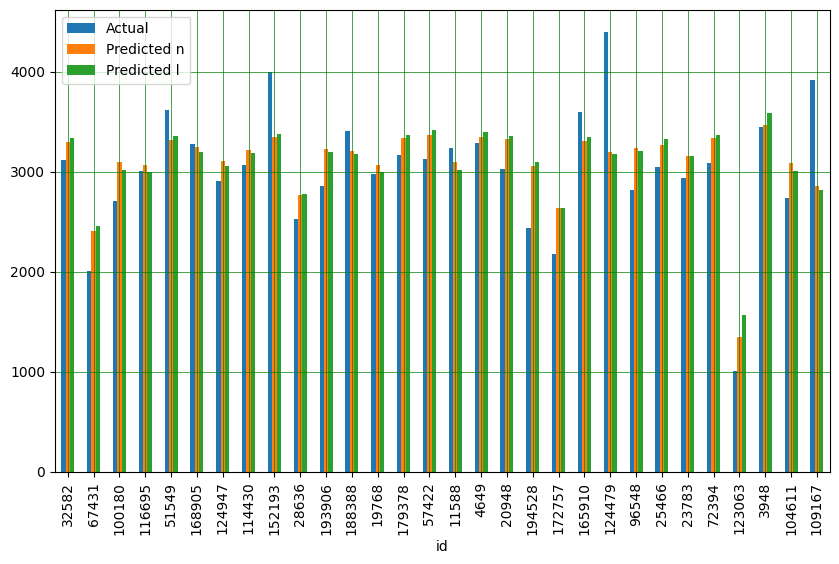

In [84]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [86]:
print('Mean Absolute Error n:', metrics.mean_absolute_error(testY, y_pred),
      'Mean Absolute Error l:', metrics.mean_absolute_error(testY, y_predlineal))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred),
      'Mean Squared Error l:', metrics.mean_squared_error(testY, y_predlineal))

Mean Absolute Error n: 283.6727303926519 Mean Absolute Error l: 287.49929774755384
Mean Squared Error: 130811.83214959601 Mean Squared Error l: 134296.25040764


La interpretación de la **curva de pérdida** depende del tipo de gráfico obtenido. \\

En la primera figura se observa que no hay convergencia. Esto indica que se debe reducir la tasa de aprendizaje para evitar que el modelo rebote en el espacio de parámetros. También indica que se podría simplificar el modelo, y luego, se puede agregar complejidad de manera gradual.

Saving noconv.png to noconv (2).png


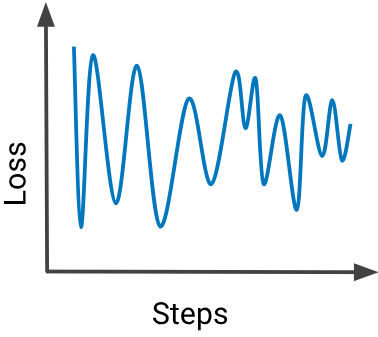

In [14]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()
from IPython.display import Image
Image('noconv.png')

Por lo general, un gran aumento en la pérdida se debe a valores anómalos en los datos de entrada. Las posibles causas son: (1) *NaN* en los datos de entrada. (2) Un gradiente con alto crecimiento debido a datos anómalos. (3) Datos con logaritmo cero o números negativos.

Saving noconv1.png to noconv1.png


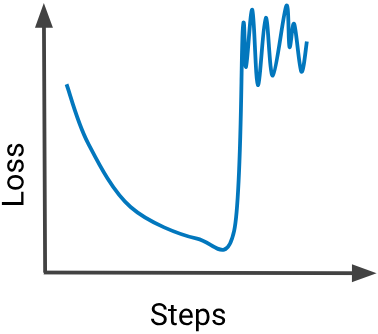

In [15]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()
from IPython.display import Image
Image('noconv1.png')

La siguiente es la gráfica de una curva de pérdida para un modelo adecuado para nuestro conjunto de datos. La información ha sido tomada del siguiente [link](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic?hl=es-419)

Saving conv.png to conv.png


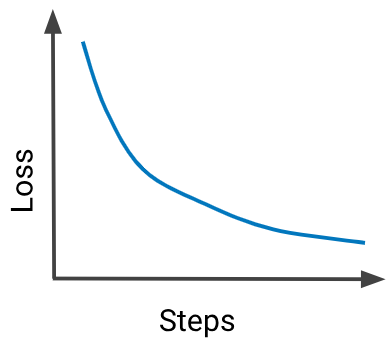

In [16]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()
from IPython.display import Image
Image('conv.png')

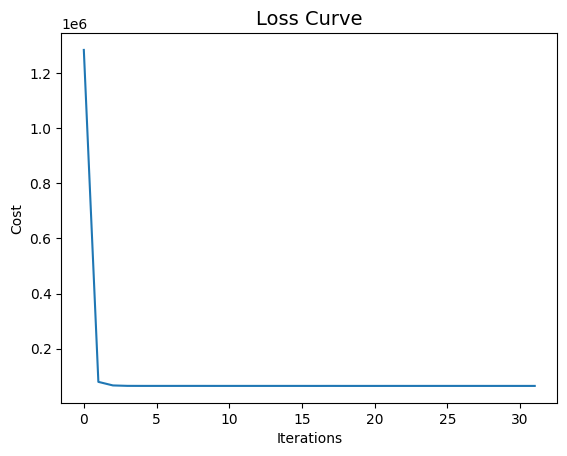

In [88]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()